# Análise Exploratória de Dados (EDA)

## Sumário
1. Importação de bibliotecas
2. Carregamento e primeira inspeção dos dados
3. Limpeza e tratamento de dados
4. Análise univariada
5. Análise bivariada
6. Análise multivariada
7. Insights e hipóteses

## 1. Importação de bibliotecas

In [89]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

## 2. Carregamento e primeira inspeção dos dados

In [90]:
df = pd.read_csv('../data/raw/desafio_indicium_imdb.csv')

Utilizando o dicionário dos dados nós temos:  
Series_Title – Nome do filme  
Released_Year - Ano de lançamento  
Certificate - Classificação etária  
Runtime – Tempo de duração  
Genre - Gênero  
IMDB_Rating - Nota do IMDB  
Overview - Overview do filme  
Meta_score - Média ponderada de todas as críticas   
Director – Diretor  
Star1 - Ator/atriz #1  
Star2 - Ator/atriz #2  
Star3 - Ator/atriz #3  
Star4 - Ator/atriz #4  
No_of_Votes - Número de votos  
Gross - Faturamento  


In [91]:
df.head()

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


In [92]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB


In [93]:
df.describe()

,Unnamed: 0,IMDB_Rating,Meta_score,No_of_Votes
count,999.000000,999.000000,842.000000,9.990000e+02
mean,500.000000,7.947948,77.969121,2.716214e+05
std,288.530761,0.272290,12.383257,3.209126e+05
min,1.000000,7.600000,28.000000,2.508800e+04
25%,250.500000,7.700000,70.000000,5.547150e+04
50%,500.000000,7.900000,79.000000,1.383560e+05
75%,749.500000,8.100000,87.000000,3.731675e+05
max,999.000000,9.200000,100.000000,2.303232e+06


In [94]:
df['Runtime'].value_counts()

Runtime
100 min    23
130 min    23
129 min    22
101 min    22
113 min    22
           ..
193 min     1
70 min      1
242 min     1
79 min      1
78 min      1
Name: count, Length: 140, dtype: int64

A coluna `Runtime` não está toda em strings

<Axes: >

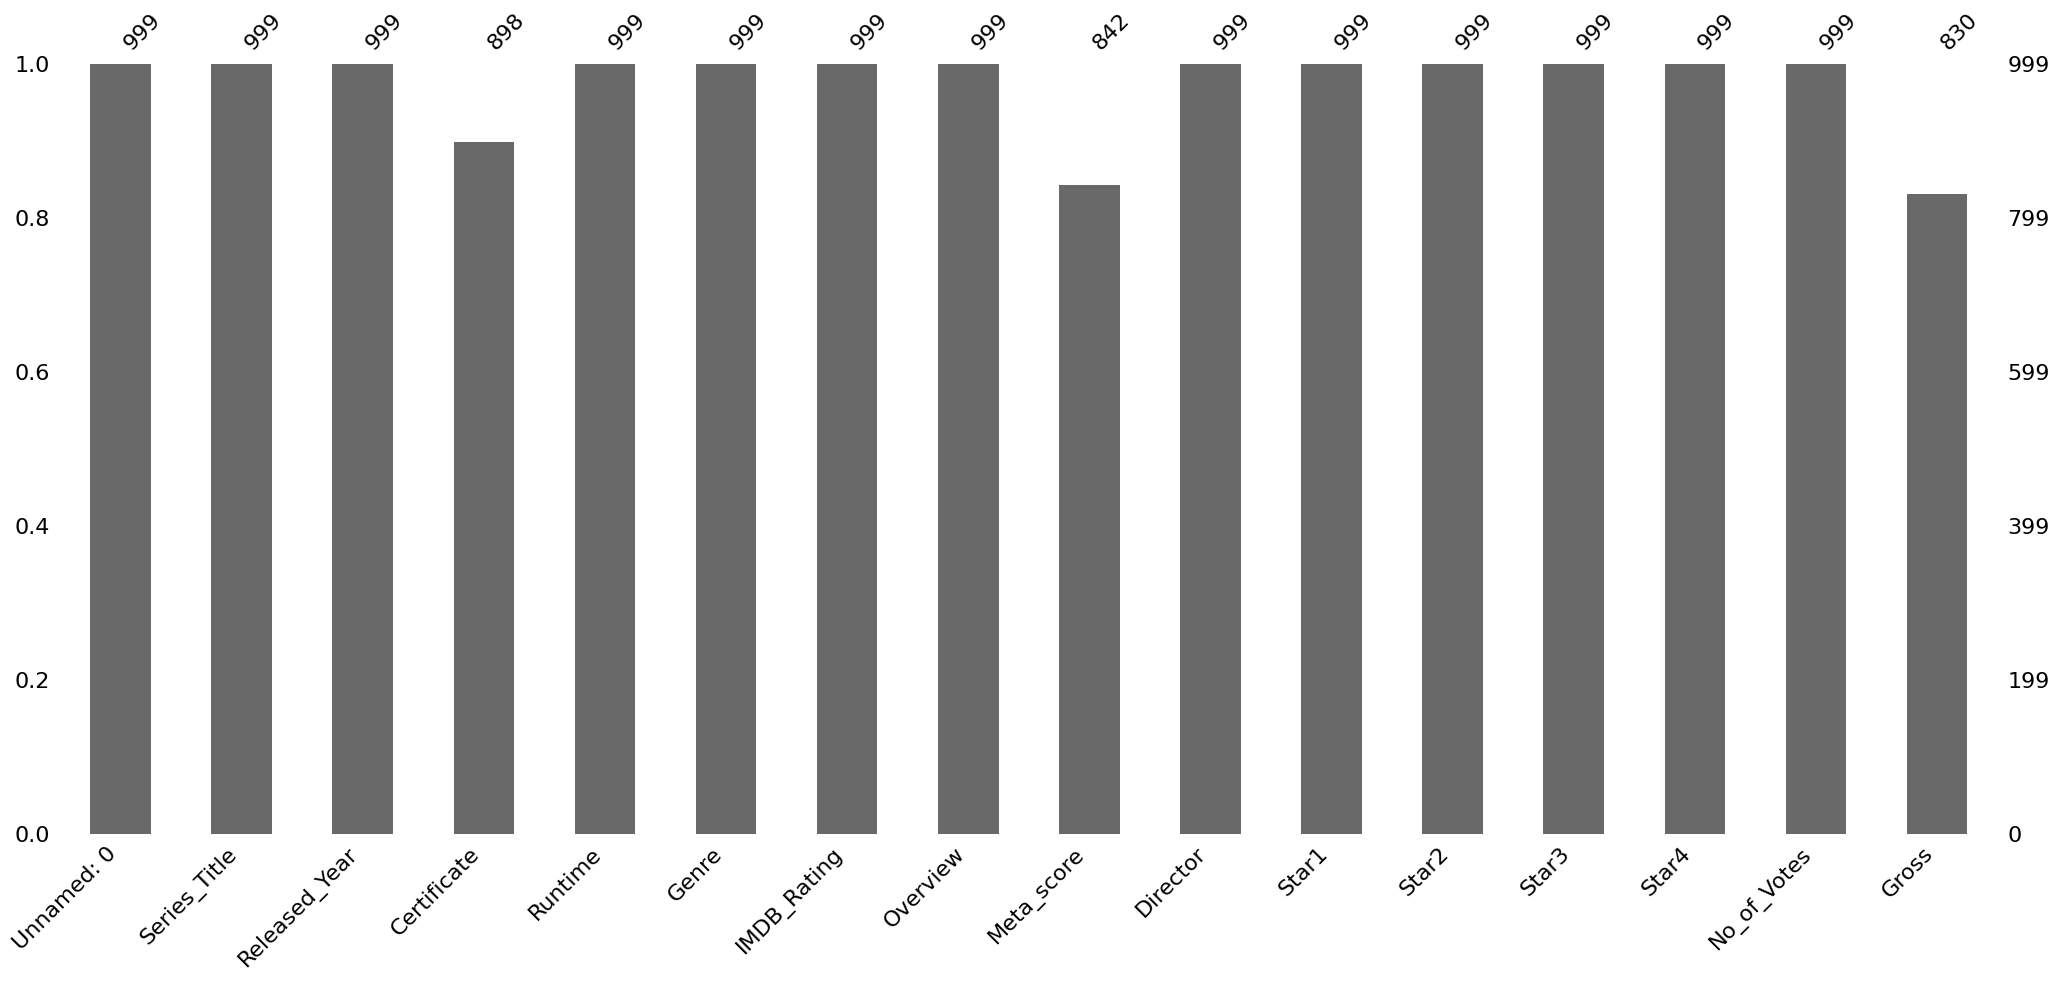

In [95]:
msno.bar(df)

Sobre a análise dos dados faltantes temos que:
- É provavel que os dados faltantes da coluna `Certificate` sejam de filmes antigos que não tinham esta classificação quando foram lançados.
- Os dados faltantes da coluna `Gross` podem decorrer de filmes que que não divulgaram seu faturamento.
- Na coluna `Meta_score` uma quantidade consideravel de valores faltantes que serão tratadas posteriormente.

In [96]:
df.duplicated().sum()

np.int64(0)

### 2.1 Identificação de problemas

Analisando superficialmente os dados podemos ver que: 
- Temos a coluna de indices `Unnamed: 0` que pode ser retirada.
- A coluna `Runtime` tem valores strings e numéricos e precisa ser tratada.
- As colunas `Certificate`, `Meta_score` e `Gross` estão com valores faltantes.
- A coluna `Gross` está com o tipo errado para uma coluna numérica.
- `Released_year` deve ser convertida para tipo numérico

## 3. Limpeza e tratamento dos dados

Começaremos criando uma cópia do dataset original

In [97]:
df_original = df.copy()
print("Backup criado com", len(df_original), "registros")

Backup criado com 999 registros


Primeiramente removeremos a coluna de indices

In [98]:
df.drop('Unnamed: 0', axis=1, inplace=True)

Agora convertendo a coluna `Runtime`, primeiramente transformaremos a coluna toda para string e depois removeremos o texto referente aos minutos.

In [99]:
df['Runtime'] = df['Runtime'].astype(str).str.replace(' min', '', regex=False)
df['Runtime'] = pd.to_numeric(df['Runtime'], errors='coerce').astype('Int64')
df['Runtime'].dtype

Int64Dtype()

In [100]:
df['Runtime'].value_counts()

Runtime
100    23
130    23
129    22
101    22
113    22
       ..
193     1
70      1
242     1
79      1
78      1
Name: count, Length: 140, dtype: Int64

Corrigindo agora a coluna `Gross`

In [101]:
df['Gross'] = df['Gross'].str.replace(',', '').astype(float)
df['Gross'].dtype

dtype('float64')

Tratando a coluna `Released_Year`

In [102]:
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')
df['Released_Year'].dtype

dtype('float64')

In [103]:
df.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Godfather,1972.0,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
1,The Dark Knight,2008.0,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
2,The Godfather: Part II,1974.0,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
3,12 Angry Men,1957.0,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0
4,The Lord of the Rings: The Return of the King,2003.0,U,201,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905.0


In [104]:
df.isna().sum()


Series_Title       0
Released_Year      1
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [105]:
df[df['Released_Year'].isna()]

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
965,Apollo 13,NaN,U,140,"Adventure, Drama, History",7.6,NASA must devise a strategy to return Apollo 1...,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,173837933.0


Nesse caso só temos uma ocorrencia de NaN e é no filme Apollo 13. Após uma pesquisa vimos que o ano de lançamento do filme é 1995.  
Fonte: https://www.imdb.com/pt/title/tt0112384/

In [106]:
df.loc[965, 'Released_Year'] = 1995

In [107]:
df.loc[df["Series_Title"] == "Apollo 13"]

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
965,Apollo 13,1995.0,U,140,"Adventure, Drama, History",7.6,NASA must devise a strategy to return Apollo 1...,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,173837933.0


In [108]:
df.isna().sum()

Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

O dado foi tratado corretamente.

Agora tratando os outros dados faltantes

IDEIA TO DO: Preencher dados faltantes via API